In [93]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

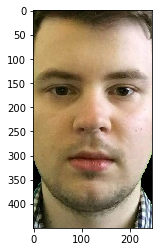

In [95]:
img = cv2.imread("Andrey_face_2.jpg", cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

Image shape is (450, 245)


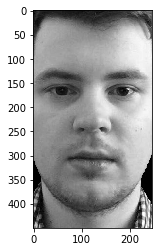

In [96]:
bw_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(f"Image shape is {bw_img.shape}")

plt.imshow(bw_img, "gray")

In [112]:
#
# Parameters
#
SQUARE_SIZE = 5
HEIGHT_SCALE = 10
HEIGHT_WIDTH = 2
BLACK_OFFSET = HEIGHT_WIDTH*HEIGHT_SCALE + SQUARE_SIZE

#
# Colors
#
clr_base_tile = 70
clr_tile_border = 25
clr_south_wall = 40
clr_west_wall = 50

#
# Objects
#
obj_base_tile = np.zeros((SQUARE_SIZE, SQUARE_SIZE))
obj_base_tile.fill(clr_base_tile)
obj_base_tile[0, :] = clr_tile_border
obj_base_tile[:, SQUARE_SIZE - 1] = clr_tile_border

# Make the brick 9x9, not 8x8
#obj_base_tile[:, 0] = clr_tile_border
#obj_base_tile[SQUARE_SIZE - 1, :] = clr_tile_border

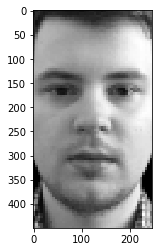

In [113]:
#
# Convert input black and white image to tiles
# This is just to visualize squared picture
#
squared_img = np.zeros(bw_img.shape)

for ii in range(bw_img.shape[0] // SQUARE_SIZE):
    for jj in range(bw_img.shape[1] // SQUARE_SIZE):
        squared_img[ii*SQUARE_SIZE:(ii+1)*SQUARE_SIZE, jj*SQUARE_SIZE:(jj+1)*SQUARE_SIZE] = \
            int(np.mean(bw_img[ii*SQUARE_SIZE:(ii+1)*SQUARE_SIZE, jj*SQUARE_SIZE:(jj+1)*SQUARE_SIZE]))
        
plt.imshow(squared_img, "gray")

In [114]:
#
# Make smaller picture to increase speed
#
small_squared_img = np.zeros((bw_img.shape[0] // SQUARE_SIZE, bw_img.shape[1] // SQUARE_SIZE))

for ii in range(small_squared_img.shape[0]):
    for jj in range(small_squared_img.shape[1]):
        small_squared_img[ii, jj] = squared_img[ii*SQUARE_SIZE, jj*SQUARE_SIZE]

#
# Scale the image of tiles
#
scaled_img = small_squared_img - small_squared_img.min()

scale = np.linspace(0, scaled_img.max(), HEIGHT_SCALE + 1)

for ii in range(scaled_img.shape[0]):
    for jj in range(scaled_img.shape[1]):
        kk = 0
        while (scaled_img[ii, jj] > scale[kk]):    
            kk = kk + 1
        scaled_img[ii, jj] = kk
        
print(scaled_img.min(), scaled_img.max())

0.0 10.0


True

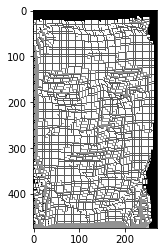

In [115]:
#
# Main body
#

# This one makes the black border!
final_img = np.zeros((bw_img.shape[0] + BLACK_OFFSET, bw_img.shape[1] + BLACK_OFFSET))

# Actually fills the image with tiles and height
for ii in range(scaled_img.shape[0]):
    for jj in range(scaled_img.shape[1] - 1, -1, -1):
        height_value = int(scaled_img[ii, jj])
        
        left_lower_row = (ii + 1)*SQUARE_SIZE - 1 + BLACK_OFFSET
        left_lower_col = jj*SQUARE_SIZE
        
        for kk in range(0, height_value*HEIGHT_WIDTH):
            final_img[left_lower_row - kk, (left_lower_col + kk):(left_lower_col + SQUARE_SIZE + kk)] = clr_south_wall
            final_img[(left_lower_row - SQUARE_SIZE - kk + BLACK_OFFSET):(left_lower_row - kk - 1 + BLACK_OFFSET), left_lower_col + kk] = clr_west_wall
        
        final_img[(left_lower_row - SQUARE_SIZE - kk):(left_lower_row - kk), 
                  (left_lower_col + kk):(left_lower_col + SQUARE_SIZE + kk)] = obj_base_tile

# Show the result
plt.imshow(final_img, "gray")

# Save the result: the OS picture viewer works better!
cv2.imwrite("result_3D.png", final_img)